In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return(pd.read_csv(csv_path))


In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


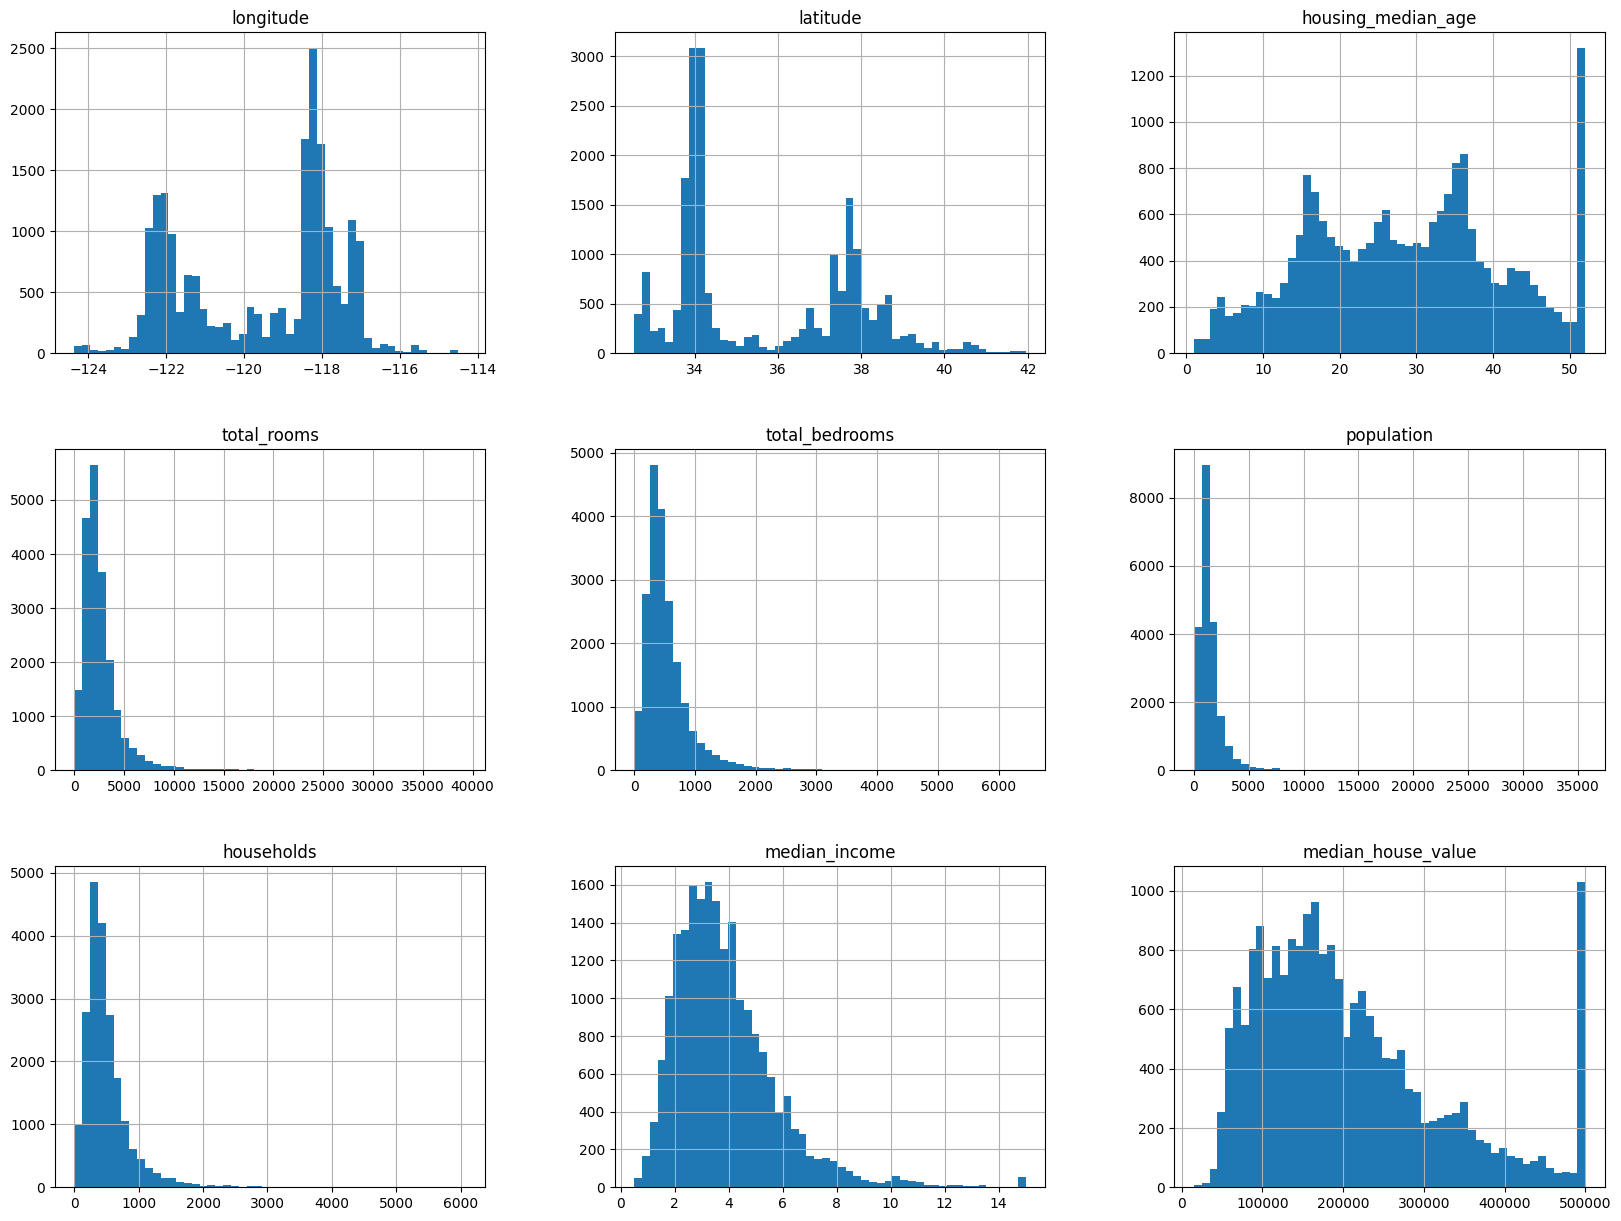

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(10)
    shuffled_indices=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_size]
    train_indices=shuffled_indices[test_size:]
    return(data.iloc[test_indices],data.iloc[train_indices])

test_set,train_set=split_train_test(housing,0.2)


In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
from sklearn.model_selection import train_test_split

x1,y1=train_test_split(housing,test_size=0.2,random_state=42)


<Axes: >

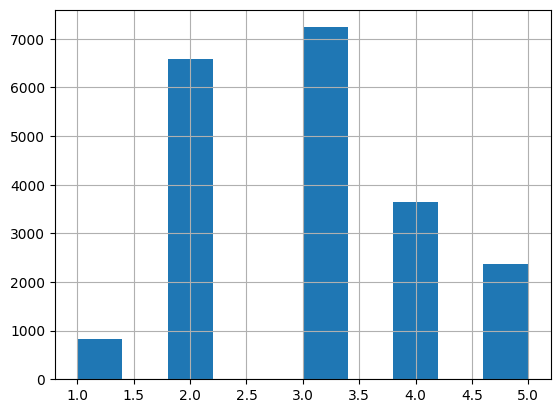

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
print(housing["income_cat"].value_counts()/len(housing))

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

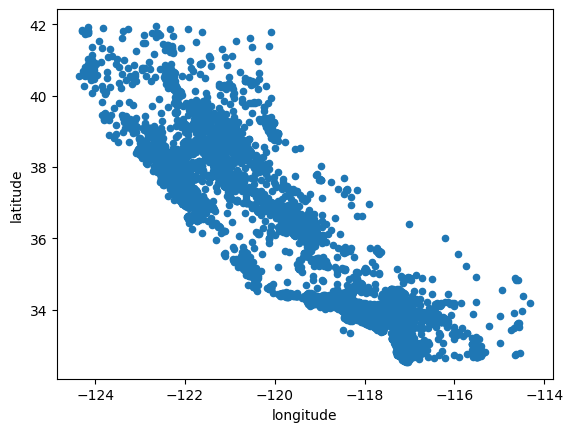

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

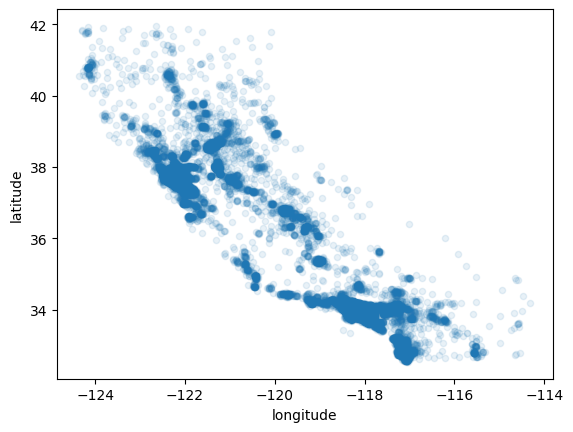

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

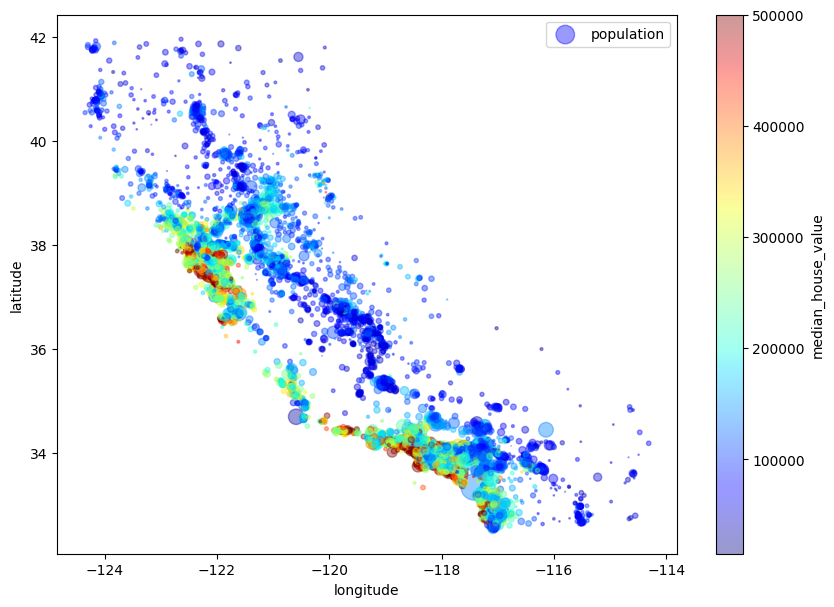

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,figsize=(10,7),s=housing["population"]/100,label="population",c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


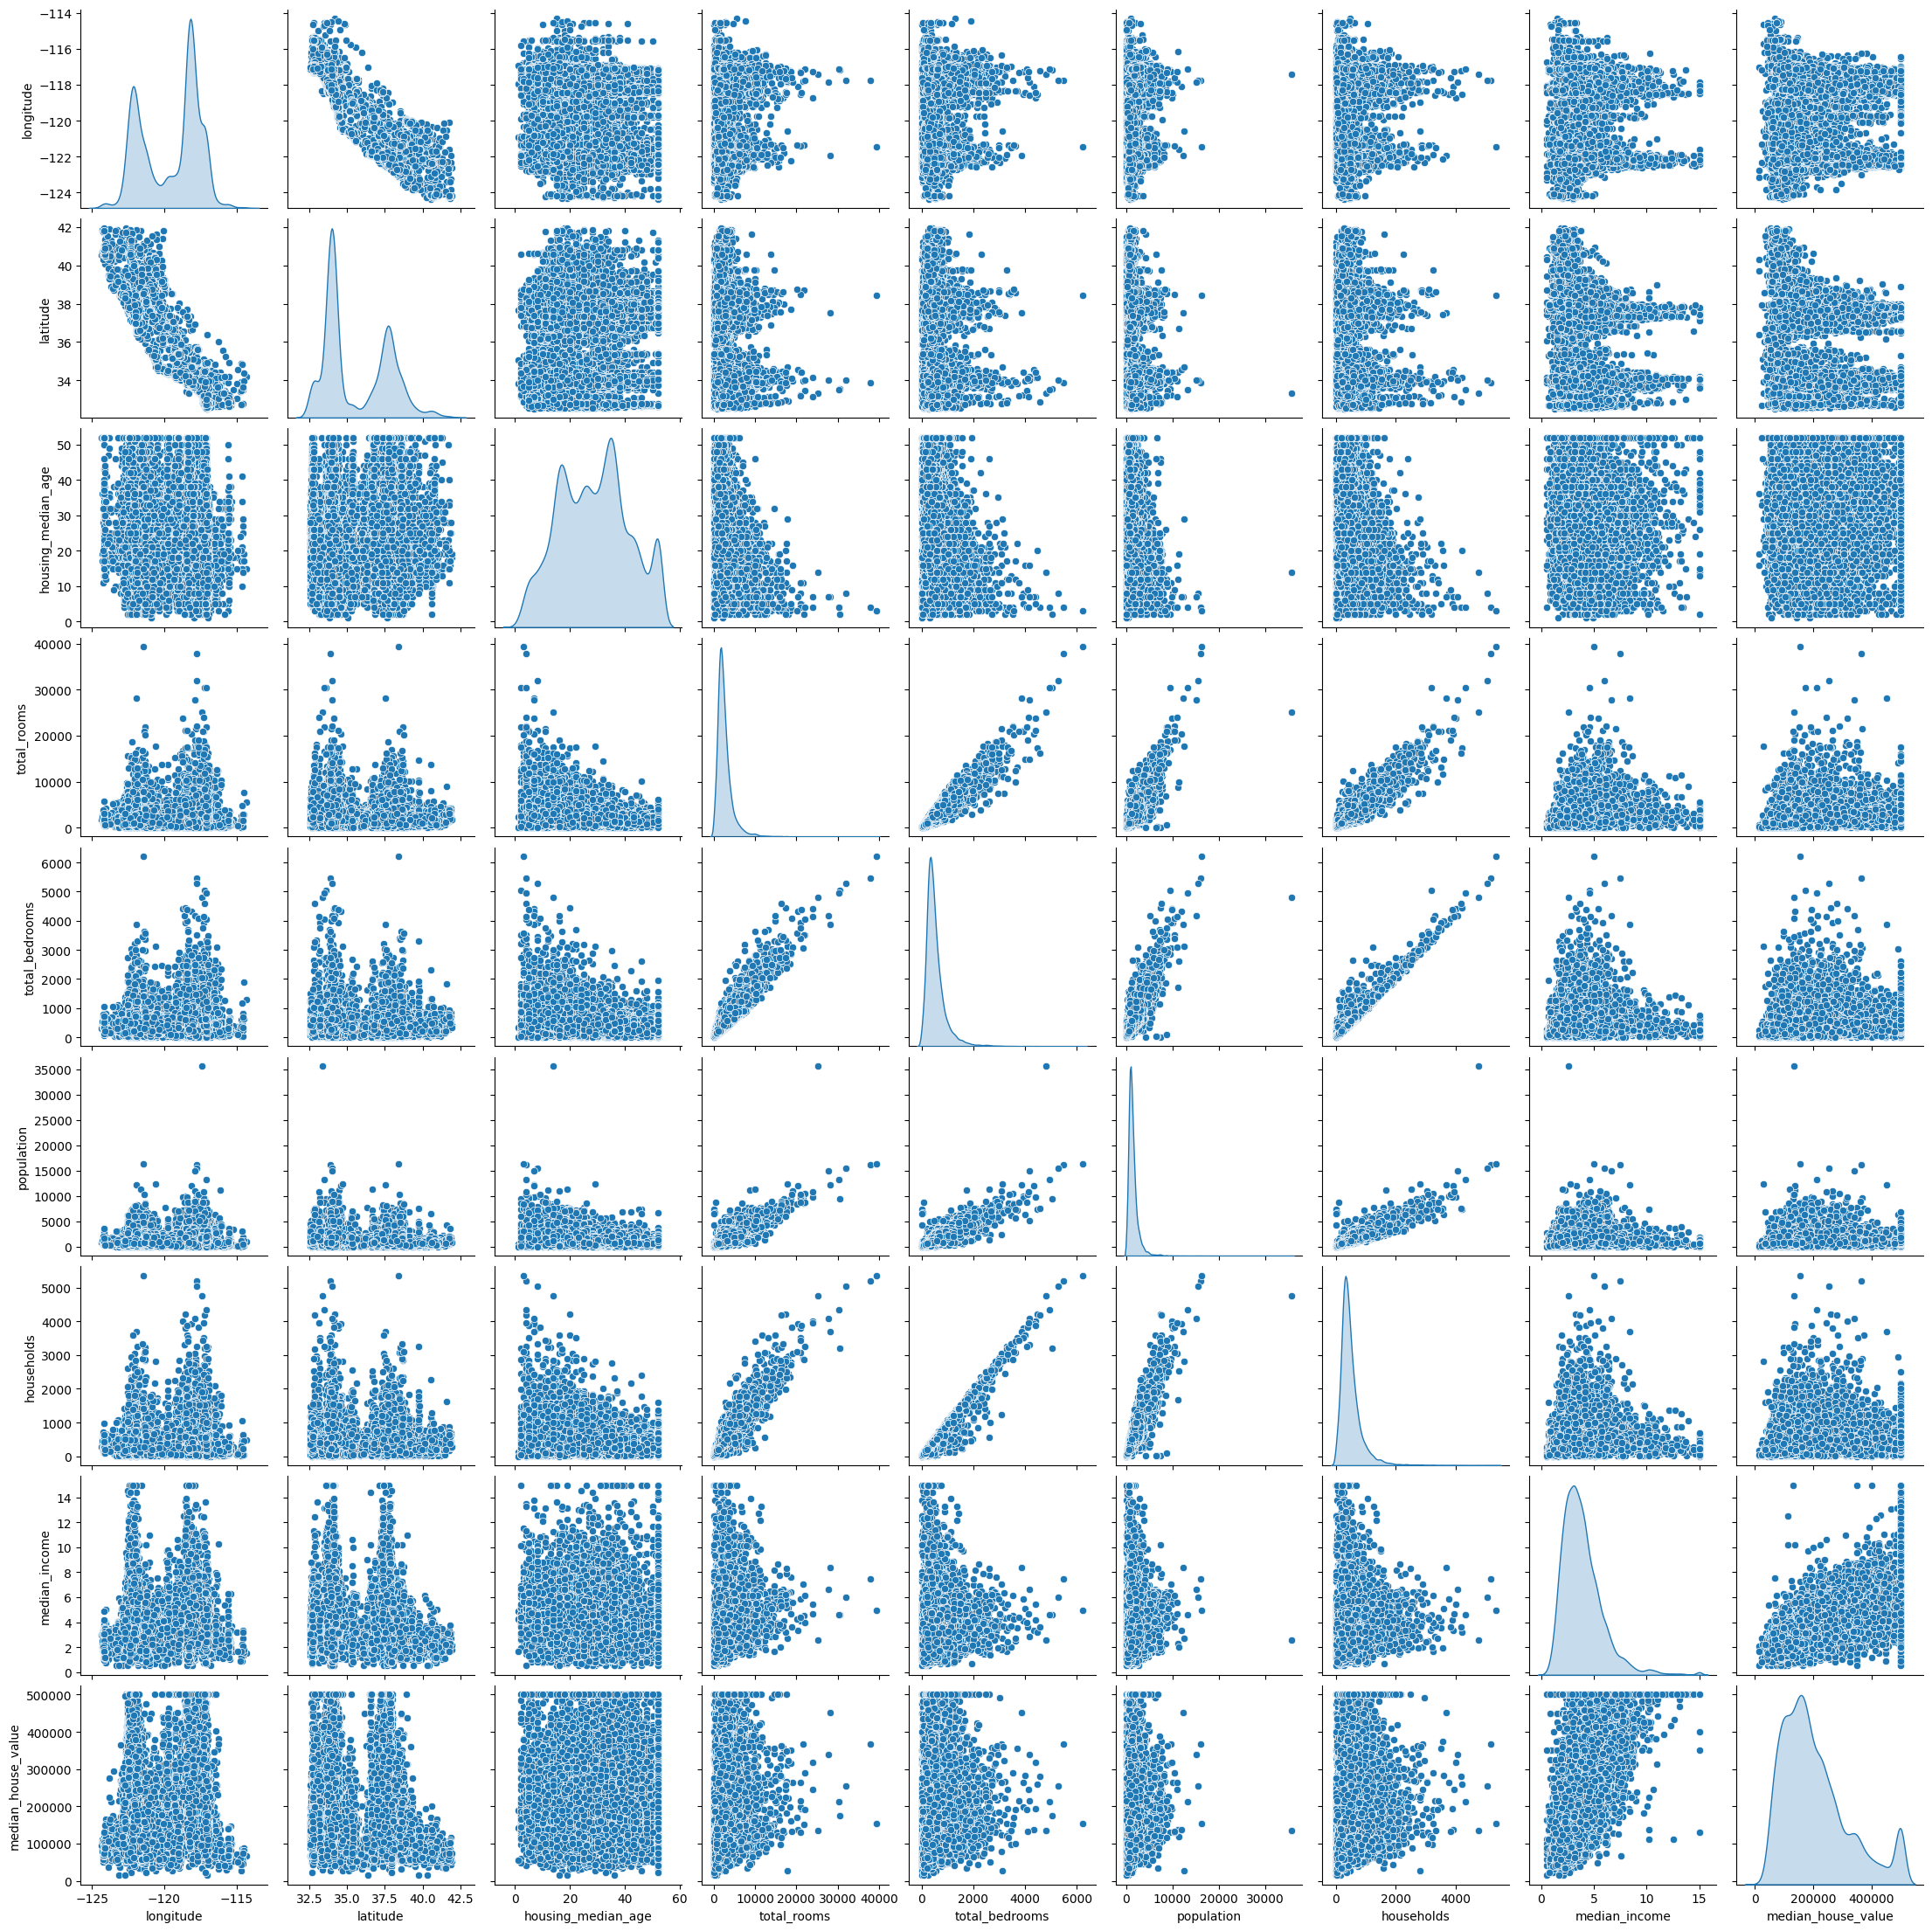

In [ ]:
import seaborn as sns
sns.pairplot(housing, markers='o', diag_kind='kde')


In [ ]:
attributes_to_exclude = ["ocean_proximity"]

attributes_for_correlation = [col for col in housing.columns if col not in attributes_to_exclude]

corr_matrix = housing[attributes_for_correlation].corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

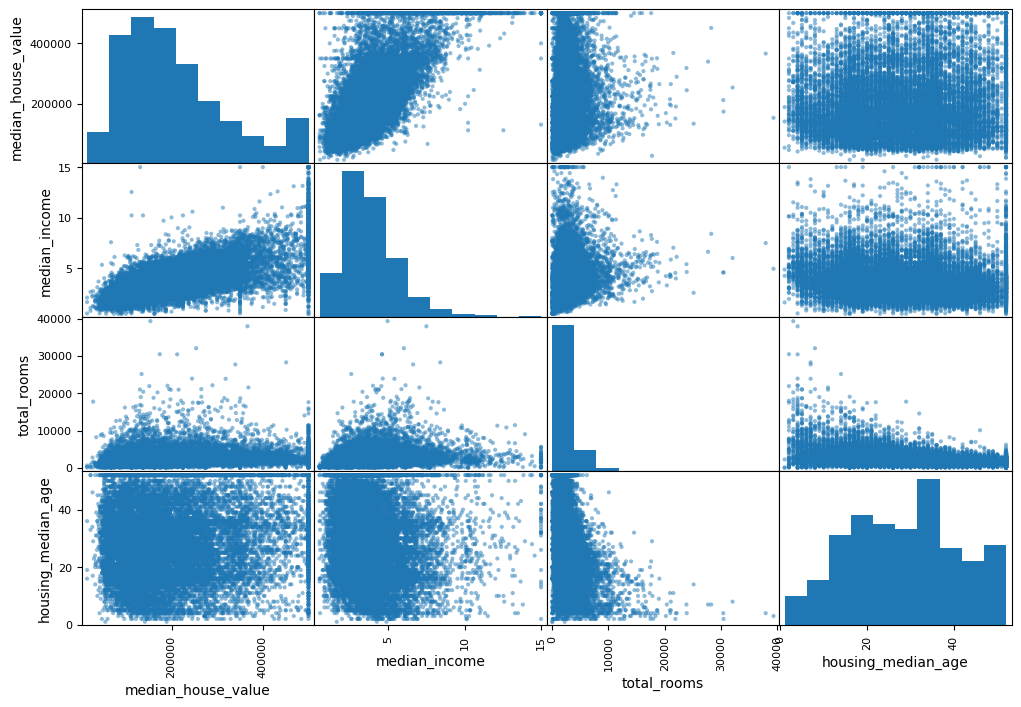

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


<ipython-input-28-c77dea458c45>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing[columns].corr(),annot=True)


<Axes: >

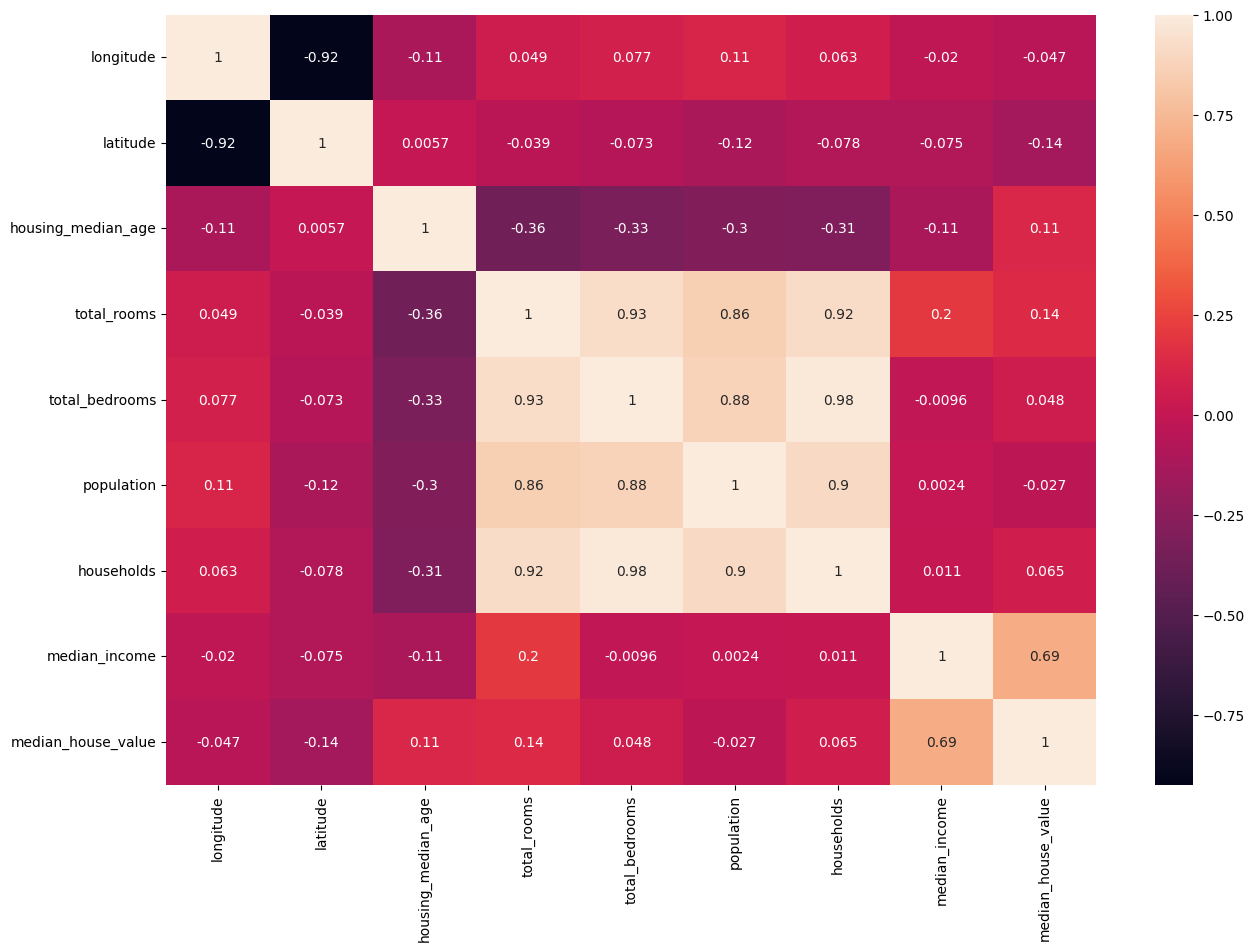

In [ ]:
plt.figure(figsize=(15,10))
columns=list(housing.columns)
print(columns)
sns.heatmap(housing[columns].corr(),annot=True)

<Axes: xlabel='median_income', ylabel='median_house_value'>

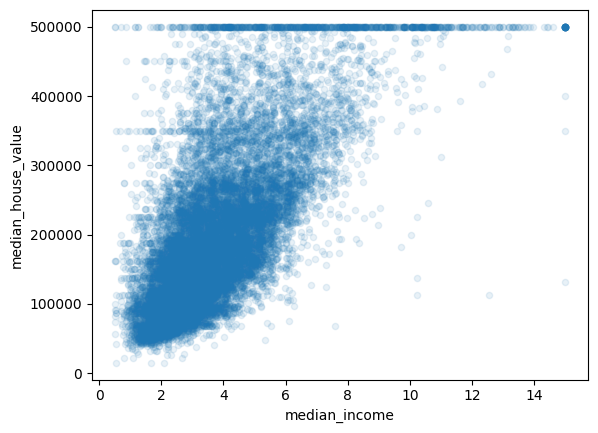

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [ ]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]



In [ ]:
attributes_to_exclude = ["ocean_proximity"]


attributes_for_correlation = [col for col in housing.columns if col not in attributes_to_exclude]

corr_matrix = housing[attributes_for_correlation].corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [ ]:
housing_cat= housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
housing_cat_en= oe.fit_transform(housing_cat)
housing_cat_en[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
catEncoder= OneHotEncoder()
housing_cat_1hot= catEncoder.fit_transform(housing_cat)
housing_cat_1hot[:20]

<20x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [ ]:
#Custom Transformer

from sklearn.base import BaseEstimator, TransformerMixin

r_idx, b_idx, p_idx, h_idx = 3, 4, 5, 6

class combineAttributes(BaseEstimator,TransformerMixin):

    def __init__(self, addBed = True):
        self.addBed=addBed

    def fit(self,X,y=None):
        return(self)

    def transform (self,X):

        r=X[:, r_idx]/X[:, h_idx]
        p = X[:, p_idx] / X[:,h_idx]

        if self.addBed:
            b = X[:, b_idx] / X[:, r_idx]
            return np.c_[X, r, r,b]
        else :
            return np.c_[X, r, p]

attr_adder = combineAttributes(False)
housing_extra_attribs = attr_adder.transform(housing.values)



housing_extra_attribs = pd.DataFrame(housing_extra_attribs,columns=list(housing.columns)+["rooms_per_household", "population_per_household"],index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', combineAttributes()),('std_scaler', StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing)


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85806.2157108  305390.62200336 151996.97918871 185908.83490813
 244568.86489392]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68635.27064635929

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels
                        ,scoring="neg_mean_squared_error",cv=10)
tree_rmse_score=np.sqrt(-scores)
print(tree_rmse_score)

[71338.96559741 69497.98509664 68387.13101503 70729.59175969
 68906.31762502 70124.97248749 71854.93283796 66854.5704232
 66170.84382614 73660.67609866]


In [ ]:
def display(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [ ]:
display(tree_rmse_score)

Scores: [71338.96559741 69497.98509664 68387.13101503 70729.59175969
 68906.31762502 70124.97248749 71854.93283796 66854.5704232
 66170.84382614 73660.67609866]
Mean: 69752.59867672212
Standard deviation: 2171.99615570848


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display(lin_rmse_scores)

Scores: [71742.79930634 64123.15164868 67525.62720914 68669.59284419
 66229.30580385 72536.14551594 74027.50779795 68826.23855501
 66448.19745248 70145.70900636]
Mean: 69027.42751399481
Standard deviation: 2947.769728317997


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18615.17751391147


In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display(forest_rmse_scores)

Scores: [50771.69994192 49918.76516149 46302.53905499 51612.83652107
 48165.67119479 50137.01487614 51169.5459717  48797.63692742
 46942.53930863 53322.49148656]
Mean: 49714.07404447113
Standard deviation: 2064.9723484872834


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres= grid_search.cv_results_

for mean_score,params in zip (cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

65885.16115642058 {'max_features': 2, 'n_estimators': 3}
57838.71583643717 {'max_features': 2, 'n_estimators': 10}
55570.05030572476 {'max_features': 2, 'n_estimators': 30}
62393.37349044597 {'max_features': 4, 'n_estimators': 3}
55155.02091112127 {'max_features': 4, 'n_estimators': 10}
52595.68520117596 {'max_features': 4, 'n_estimators': 30}
61850.24674767825 {'max_features': 6, 'n_estimators': 3}
54030.60277104123 {'max_features': 6, 'n_estimators': 10}
51585.075824891144 {'max_features': 6, 'n_estimators': 30}
60579.76601973243 {'max_features': 8, 'n_estimators': 3}
53234.805017935636 {'max_features': 8, 'n_estimators': 10}
50824.78735355598 {'max_features': 8, 'n_estimators': 30}
65264.66521532607 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56126.60288933596 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62807.35764091031 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54472.91307260809 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[9.94608202e-02 8.54411112e-02 4.61788494e-02 1.99224479e-02
 2.27948690e-02 3.01219386e-02 1.93502439e-02 3.46825388e-01
 3.39130467e-02 5.95377206e-02 6.12883995e-02 9.66098819e-03
 1.55726370e-01 6.15216198e-05 2.73311002e-03 6.98317496e-03]


In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3468253883552393, 'median_income'),
 (0.15572636979640597, 'INLAND'),
 (0.0994608201890868, 'longitude'),
 (0.08544111124235937, 'latitude'),
 (0.06128839948767252, 'bedrooms_per_room'),
 (0.05953772056868106, 'pop_per_hhold'),
 (0.04617884941429057, 'housing_median_age'),
 (0.03391304670894506, 'rooms_per_hhold'),
 (0.030121938634970438, 'population'),
 (0.02279486897353399, 'total_bedrooms'),
 (0.019922447914137803, 'total_rooms'),
 (0.019350243921475285, 'households'),
 (0.009660988189495267, '<1H OCEAN'),
 (0.006983174960946794, 'NEAR OCEAN'),
 (0.0027331100229440355, 'NEAR BAY'),
 (6.152161981590887e-05, 'ISLAND')]

In [ ]:

X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
final_predictions = forest_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Root Mean Square Error : ",final_rmse)

Root Mean Square Error :  47795.66874575996


In [ ]:
print("Linear tree Regression Model Score is: ",lin_reg.score(X_test_prepared,y_test)*100,"%")
print("Decision tree  Regression Model Score is: ",(tree_reg.score(X_test_prepared,y_test)*100),"%")
print("Random Forest Regression Model Score is: ",(forest_reg.score(X_test_prepared,y_test)*100),"%")

Linear tree Regression Model Score is:  65.6505391507182 %
Decision tree  Regression Model Score is:  64.8148202985662 %
Random Forest Regression Model Score is:  82.47218880494273 %


In [ ]:
from ipywidgets import widgets

lst_inputs = []

for i in range(9):
    input_text = widgets.Text()
    lst_inputs.append(input_text)

from google.colab import widgets
import ipywidgets
from IPython.display import display

grid = widgets.Grid(1, 5, header_row=True, header_column=True)
column_lst = list(X_test.columns)
print(column_lst)

for (row, col) in grid:
    index = row * 5 + col
    print(column_lst[index])
    display(lst_inputs[index])

for (row, col) in grid:
    index = row * 5 + col
    if(index==4):
      break
    print(column_lst[index+5])
    display(lst_inputs[index+5])



,,,,


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

longitude


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

latitude


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

housing_median_age


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

total_rooms


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

total_bedrooms


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

population


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

households


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

median_income


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ocean_proximity


Text(value='')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(X_test.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [ ]:
lst=[]
for i in range(9):
  lst.append(lst_inputs[i].value)

lst=[lst]
print(lst)
prepared_input = full_pipeline.transform(pd.DataFrame(lst,columns=list(X_test.columns),index=X_test.index))

opt = forest_reg.predict(prepared_input)
print("The price is predicted to be,",opt[0],"$")

[['-122.23', '37.88', '41.0', '880', '129', '322', '126', '452600', 'NEAR BAY']]
The price is predicted to be, 498831.98 $


 -122.23	37.88	41.0	880.0	129.0	322.0	126.0	8.3252	452600.0	NEAR BAY